In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class GammaExponential():
    def __init__(self, gamma, l):
        self.gamma = gamma
        self.l = l
    
    def __call__(self, x, xstar = None):
        #equation 4.18
        #gamma less than or equal to 2, larger than 1
        if xstar is not None:
            K = np.zeros((len(x), len(xstar)))

            for i in range(len(xstar)):
                temp = np.repeat(np.reshape(xstar[i],(1,-1)), len(x), axis = 0)
                dist = np.sum(abs(x-temp), axis = 1)
                K[:,i] = np.exp(-(dist/self.l)**self.gamma)

        else:
            K = np.zeros((len(x), len(x)))

            for i in range(len(x)):
                temp = np.repeat(np.reshape(x[i],(1,-1)), len(x), axis = 0)
                dist = np.sum(abs(x[:,np.newaxis]-temp), axis = 1)
                K[:,i] = K[:,i] = np.exp(-(dist/self.l)**self.gamma)
        return K

In [3]:
x = np.linspace(-5,5, 2000)
kernel = GammaExponential(gamma = 1, l = 2)
K1 = kernel(x)

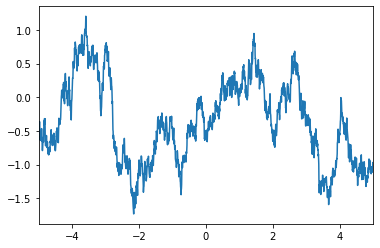

In [4]:
sample = np.random.multivariate_normal(np.zeros(len(x)), K1, 1)
plt.plot(x, sample[0,:])
plt.xlim(-5,5)
plt.show()

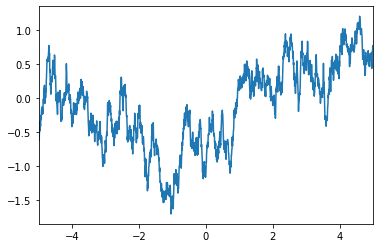

In [5]:
kernel = GammaExponential(gamma = 1, l = 2)
K15 = kernel(x)
sample = np.random.multivariate_normal(np.zeros(len(x)), K15, 1)
plt.plot(x, sample[0,:])
plt.xlim(-5,5)
plt.show()

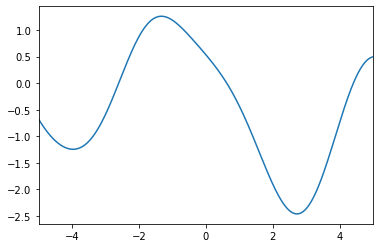

In [6]:
kernel = GammaExponential(gamma = 2, l = 2)
K2 = kernel(x)
sample = np.random.multivariate_normal(np.zeros(len(x)), K2, 1)
plt.plot(x, sample[0,:])
plt.xlim(-5,5)
plt.show()

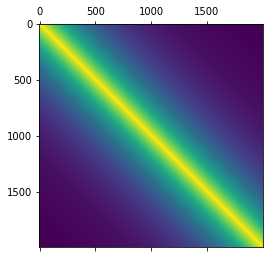

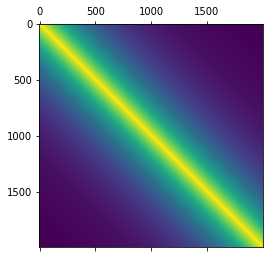

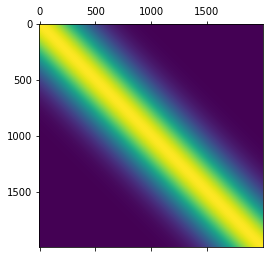

In [7]:
plt.matshow(K1)
plt.matshow(K15)
plt.matshow(K2)
plt.show()

In [9]:
# Simulate two Ornstein-Uhlenbeck processes
t_init = 3
t_end  = 7
N      = 2000  # Compute 1000 grid points
dt     = float(t_end - t_init) / N
x = np.zeros((2,N))

sigma = [0.2,0.2]  # Standard deviation.
theta = [0.7, 0.7] #theta
mu = [-0.2,0.2]  # Mean.

for n in range(2):
    for i in range(1,N):
        y = x[n, i-1]
        x[n, i] = y + dt*(mu[n]-y)*theta[n] + np.random.normal(0.0, scale =np.sqrt(dt))*sigma[n]    

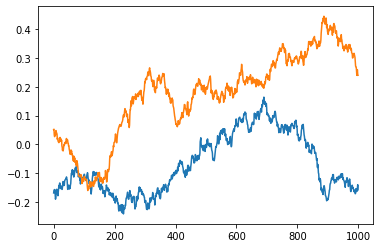

In [10]:
plt.plot(x[0,1000::])
plt.plot(x[1,1000::])

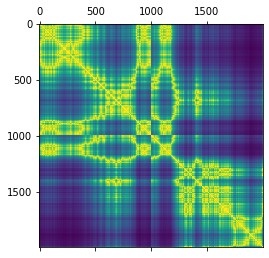

In [17]:
x_c = np.concatenate((x[0,1000::], x[1,1000::]))
kernel = GammaExponential(gamma = 1, l = 0.2)
K_OS = kernel(x_c)
plt.matshow(K_OS)
plt.show()

Populating the interactive namespace from numpy and matplotlib


 /Users/theabrusch/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning:pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

 /Users/theabrusch/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

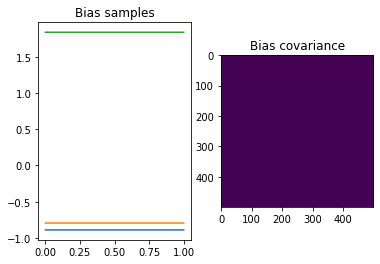

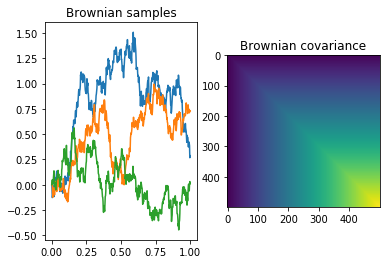

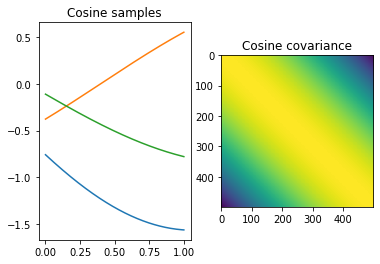

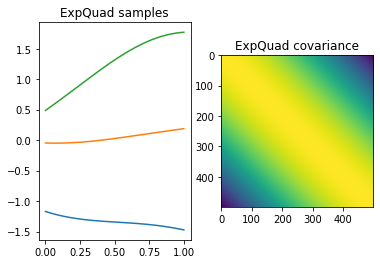

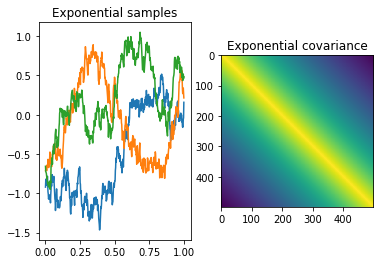

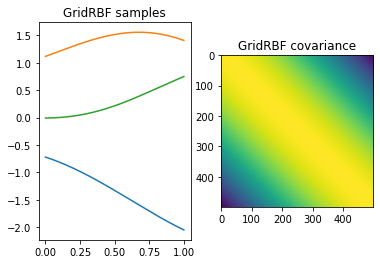

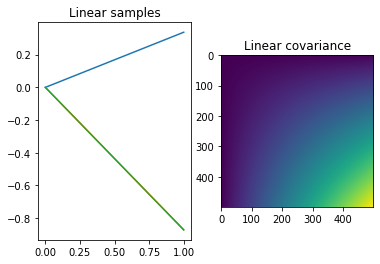

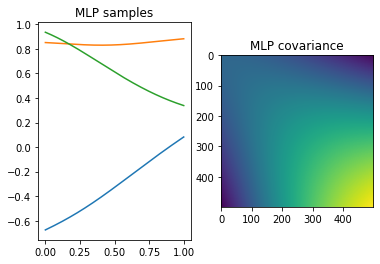

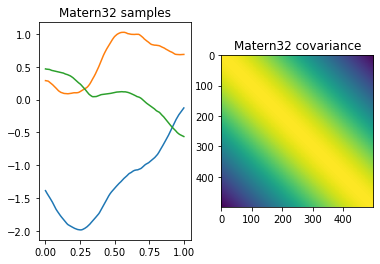

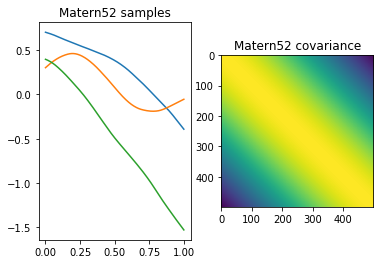

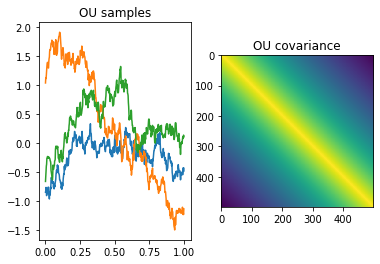

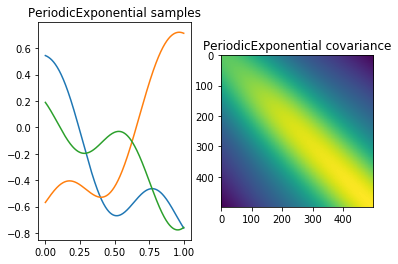

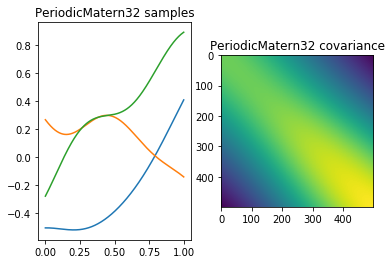

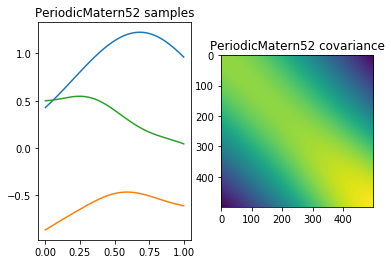

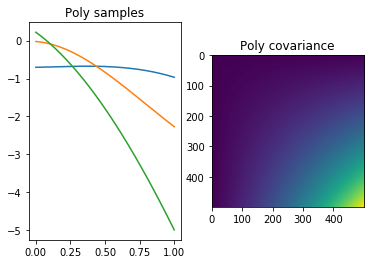

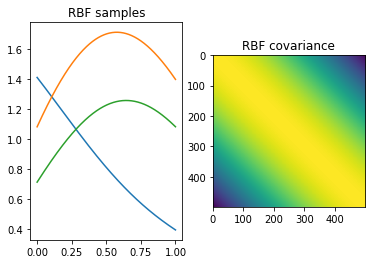

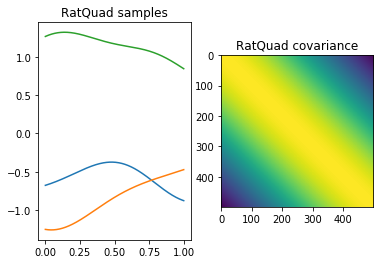

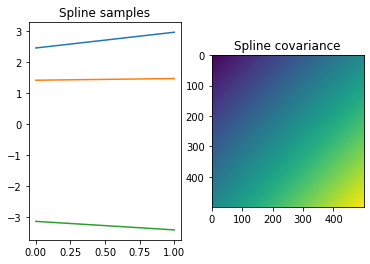

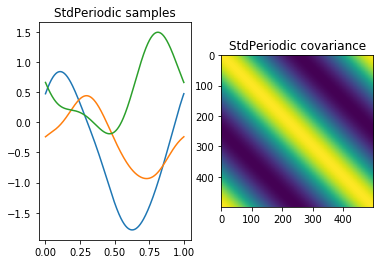

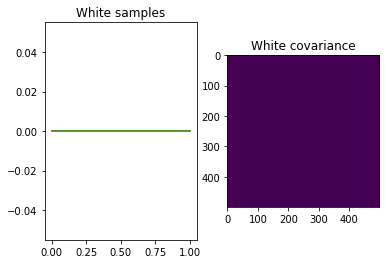

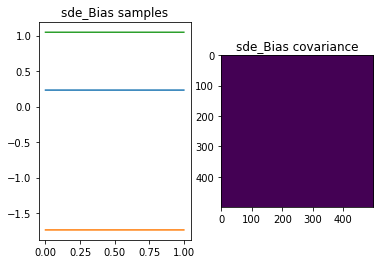

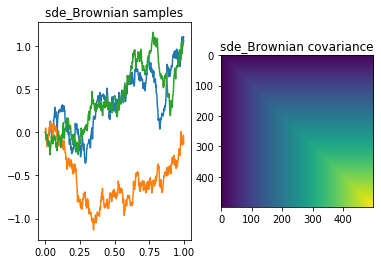

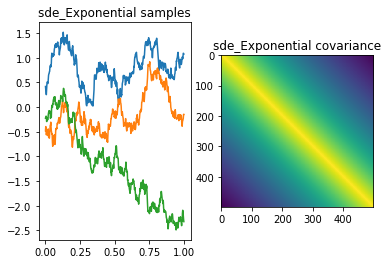

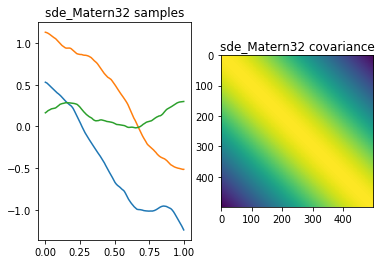

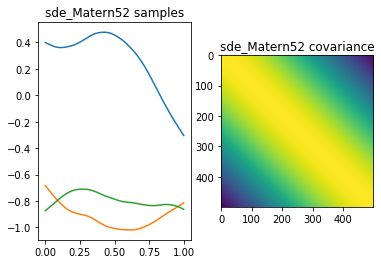

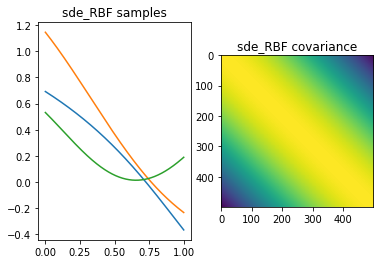

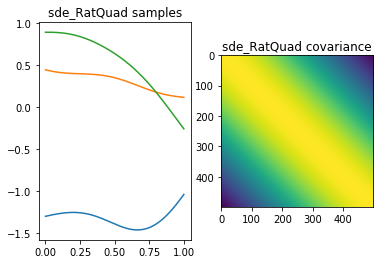

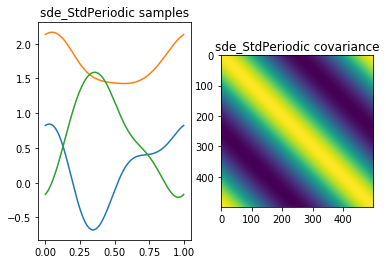

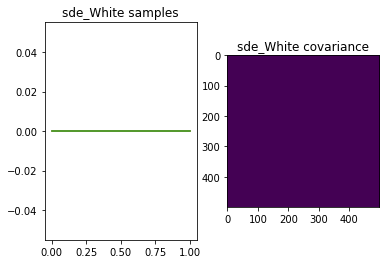

In [2]:
%pylab inline
import numpy as np
import pylab as plt
import GPy
import re
from IPython.display import Math, display

def get_equation(kern):
    match = re.search(r'(math::)(\r\n|\r|\n)*(?P<equation>.*)(\r\n|\r|\n)*', kern.__doc__)
    return '' if match is None else match.group('equation').strip()

for kernel_name in dir(GPy.kern):
    Kernel = getattr(GPy.kern, kernel_name)
    
    if Kernel.__class__ == GPy.kern.Exponential.__class__ == GPy.kern.src.kernel_slice_operations.KernCallsViaSlicerMeta:        
        # Try plotting sample paths here
        try:
            k = Kernel(input_dim=1)
            
            X = np.linspace(0.,1.,500) # define X to be 500 points evenly spaced over [0,1]
            X = X[:,None] # reshape X to make it n*p --- we try to use 'design matrices' in GPy 

            mu = np.zeros((500))# vector of the means --- we could use a mean function here, but here it is just zero.
            C = k.K(X,X) # compute the covariance matrix associated with inputs X

            # Generate 20 separate samples paths from a Gaussian with mean mu and covariance C
            Z = np.random.multivariate_normal(mu,C,20)

                        
            kernel_equation = get_equation(k)
            #print kernel_equation
            from IPython.display import Math, display
            display(Math(kernel_equation))
            
            fig = plt.figure()     # open a new plotting window
            plt.subplot(121)
            for i in range(3):
                plt.plot(X[:],Z[i,:])

            plt.title('{} samples'.format(kernel_name))
            
            plt.subplot(122)
            plt.imshow(C, interpolation='nearest')
            plt.title('{} covariance'.format(kernel_name))
        except:
            continue